# Topics in Econometrics and Data Science: Tutorial 4

#### General Note

You will very likely find the solution to these exercises online. We, however, strongly encourage you to work on these exercises without doing so. Understanding someone else’s solution is very different from coming up with your own. Use the lecture notes and try to solve the exercises independently.

## Exercise 1: Pandas DataFrames

Create a folder ‘data’ and save the `brain_size.csv` data set. You can enter the complete path of the data or change the current working directory to the path (which then should contain your data folder) by

In [ ]:
import os
os.chdir('C:/.../data')

Now load the `brain_size.csv` data set. The dataset contains a small sample of observations of features (like gender, weight, height and three different IQ-measures) for different individuals.

In [49]:
import numpy as np
import pandas as pd
brain_size = pd.read_csv('brain_size.csv', sep=';', na_values=".")
brain_size.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


Before we perform some analysis, we will do some preprocessing.

* Load the data set and drop the column `Unnamed: 0`. 

* Use `DataFrame.dropna()` to clean your data from entries containing `NaN` values. How many observations are left after the data cleaning?

Calculate the following descriptive statistics.

* How many observations/individuals do we have?

* Calculate the means and standard deviations for VIQ, Weight and Height. What is the median of Weight? 

* What is the percentage of women in the data set?

* As a primitive approach to determine whether there are differences based on gender, calculate the means of the features above, again conditioned on gender.

In [ ]:
brain_size.drop(['Unnamed: 0'], axis = 1, inplace=False)
brain_size.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [51]:
brain_size.drop(['Unnamed: 0'], axis = 1, inplace=True)
brain_size.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


In [52]:
print(brain_size.shape)
brain_size.dropna(inplace = True)
print(brain_size.shape)

(40, 7)
(38, 7)


In [53]:
print(brain_size['VIQ'].mean())
print(brain_size.loc[:,'VIQ'].mean())
print(brain_size['VIQ'].std())

print(brain_size['Weight'].mean())
print(brain_size['Weight'].std())

print(brain_size['Height'].mean())
print(brain_size['Height'].std())

112.13157894736842
112.13157894736842
22.939604667570222
151.05263157894737
23.478509286005146
68.42105263157895
3.993789631262101


In [54]:
brain_size.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01
mean,113.552632,112.131579,111.342105,151.052632,68.421053,9.067542e+05
std,23.815391,22.939605,22.597867,23.478509,3.993790,7.256175e+04
min,77.000000,71.000000,72.000000,106.000000,62.000000,7.906190e+05
25%,90.250000,90.250000,89.250000,135.250000,66.000000,8.548115e+05
50%,116.500000,113.000000,115.000000,146.500000,68.000000,9.053990e+05
75%,135.000000,129.000000,128.000000,172.000000,70.375000,9.495405e+05
max,144.000000,150.000000,150.000000,192.000000,77.000000,1.079549e+06


In [55]:
print(brain_size['Weight'].median())

146.5


In [57]:
print(np.sum(brain_size["Gender"]=="Female"))
print(np.sum(brain_size["Gender"]=="Male"))

(brain_size["Gender"] == "Female").mean() * 100

20
18


52.63157894736842

In [58]:
brain_size.groupby('Gender').mean() 

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,
Female,111.900000,109.450000,110.450000,137.200000,65.765000,862654.600000
Male,115.388889,115.111111,112.333333,166.444444,71.372222,955753.722222


In [59]:
brain_size.groupby('Gender').agg('mean')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,
Female,111.900000,109.450000,110.450000,137.200000,65.765000,862654.600000
Male,115.388889,115.111111,112.333333,166.444444,71.372222,955753.722222


In [60]:
brain_size.groupby('Gender').agg(['mean', 'std', 'median'])

FSIQ                           VIQ                    \
              mean        std median        mean        std median   
Gender                                                               
Female  111.900000  23.686327  115.5  109.450000  21.670924  116.0   
Male    115.388889  24.507235  118.0  115.111111  24.547406  110.5   

               PIQ                        Weight                       Height  \
              mean        std median        mean        std median       mean   
Gender                                                                          
Female  110.450000  21.946046  115.0  137.200000  16.953807  138.5  65.765000   
Male    112.333333  23.899299  117.0  166.444444  20.047656  172.0  71.372222   

                             MRI_Count                          
             std median           mean           std    median  
Gender                                                          
Female  2.288248  66.00  862654.600000  55893.555780  855365.0  
Male    3.367807  70.25  955753.722222  56015.912402  947241.5

In [61]:
brain_size.groupby('Gender').mean().diff(axis = 0)

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,
Female,NaN,NaN,NaN,NaN,NaN,NaN
Male,3.488889,5.661111,1.883333,29.244444,5.607222,93099.122222


In [62]:
brain_size.groupby('Gender').mean().diff(axis = 0).dropna()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,
Male,3.488889,5.661111,1.883333,29.244444,5.607222,93099.122222


In [63]:
brain_size.groupby('Gender').agg('mean').diff(axis = 0).dropna()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,
Male,3.488889,5.661111,1.883333,29.244444,5.607222,93099.122222


## Exercise 2: Basic visualization with `matplotlib` and `seaborn`


In this exercise, we will visualize data from a cosinus function. To do so, set up data for a variable `x` with `np.linspace`, on which you apply the cosinus function. 

* Create a **scatter** plot with `matplotlib`.

* Create a **line** plot with `seaborn`.

* Add a sinus function to the graph in `matplotlib`.

* Add a sinus function to the graph in `seaborn` via a dashed line.

* Create a random variable that simulates a coin flip. Use the information according to the coin flip to provide a color argument to the scatter plot in `matplotlib`.

* Put the four different figures as subfigures into one major figure.

**Hint**: More information about data types for seaborn can be found [here](https://seaborn.pydata.org/tutorial/data_structure.html) and about subfigures in matplotlib [here](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html) and [here](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html).

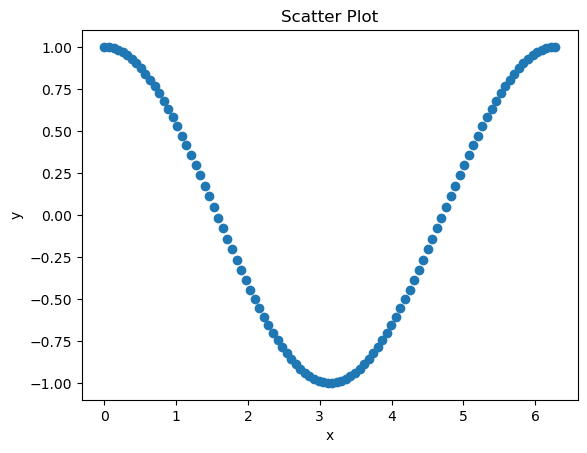

In [64]:
# Step 1: imports
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Generate the data for variable x
x = np.linspace(0, 2*np.pi, 100)

# Step 3: Apply the cosine function to x
y = np.cos(x)

# Step 4: Create a scatter plot using matplotlib
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')

# Step 5: Show the plots
plt.show()

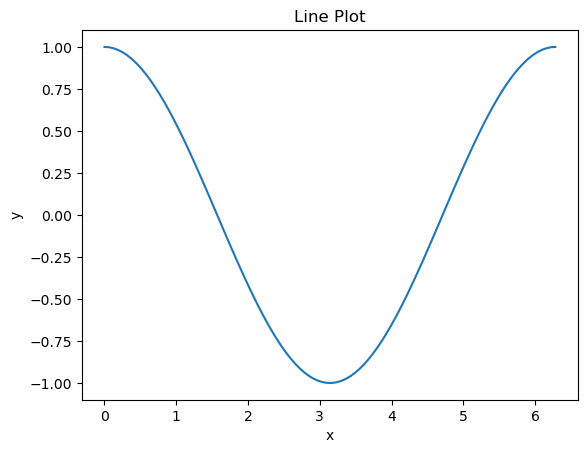

In [65]:
import pandas as pd
import seaborn as sns

# data types for seaborn
# https://seaborn.pydata.org/tutorial/data_structure.html

# Step 1: Generate the data for variable x
x = np.linspace(0, 2*np.pi, 100)

# Step 2: Apply the cosine function to x
y = np.cos(x)

# Step 3: Create a line plot using seaborn
df_plot = pd.DataFrame({'x': x, 'y': y})
sns.lineplot(df_plot, x = 'x', y = 'y')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Plot')

# Step 4: Show the plot
plt.show()

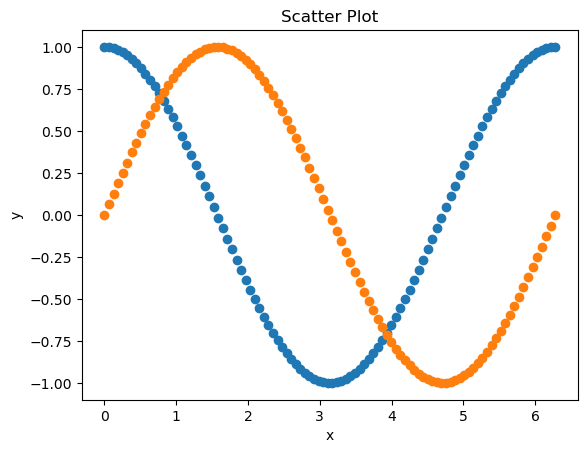

In [66]:
# Step 1: imports
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Generate the data for variable x
x = np.linspace(0, 2*np.pi, 100)

# Step 3: Apply the cosine function to x
y = np.cos(x)
z = np.sin(x)

# Step 4: Create a scatter plot using matplotlib
plt.scatter(x, y)
plt.scatter(x, z)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')

# Step 5: Show the plot
plt.show()

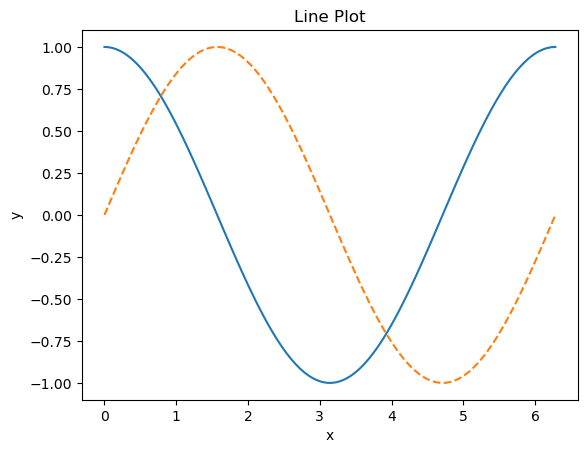

In [67]:
# Step 1: Generate the data for variable x
x = np.linspace(0, 2*np.pi, 100)

# Step 2: Apply the cosine function to x
y = np.cos(x)
z = np.sin(x)


# Step 3: Create a line plot using seaborn
df_plot = pd.DataFrame({'x': x, 'y': y, 'z': z})
sns.lineplot(df_plot, x = 'x', y = 'y')
sns.lineplot(df_plot, x = 'x', y = 'z', linestyle = '--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Plot')

# Step 4: Show the plot
plt.show()

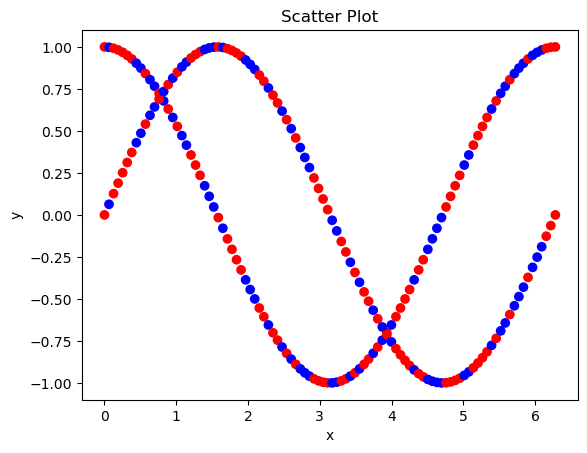

In [68]:
np.random.seed(123)

coin_flip_color = np.random.choice(['red', 'blue'], 100)

# Step 1: imports
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Generate the data for variable x
x = np.linspace(0, 2*np.pi, 100)

# Step 3: Apply the cosine function to x
y = np.cos(x)
z = np.sin(x)

# Step 4: Create a scatter plot using matplotlib
plt.scatter(x, y, color = coin_flip_color)
plt.scatter(x, z, color = coin_flip_color)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')

# Step 5: Show the plots
plt.show()

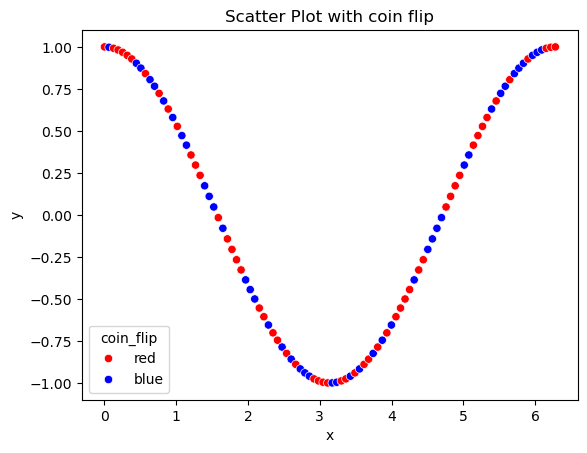

In [76]:
# Step 1: Generate the data for variable x
x = np.linspace(0, 2*np.pi, 100)

# Step 2: Generate the data for variable x
x = np.linspace(0, 2*np.pi, 100)

# Step 3: Apply the cosine function to x
y = np.cos(x)

df = pd.DataFrame({'x': x, 'y': y, 'coin_flip': coin_flip_color})

# Step 4: Create a scatter plot using matplotlib
#sns.scatterplot(df, x = 'x', y = 'y', hue = 'coin_flip')
sns.scatterplot(df, x = 'x', y = 'y', hue = 'coin_flip', palette = ['red','blue'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with coin flip')

# Step 5: Show the plots
plt.show()

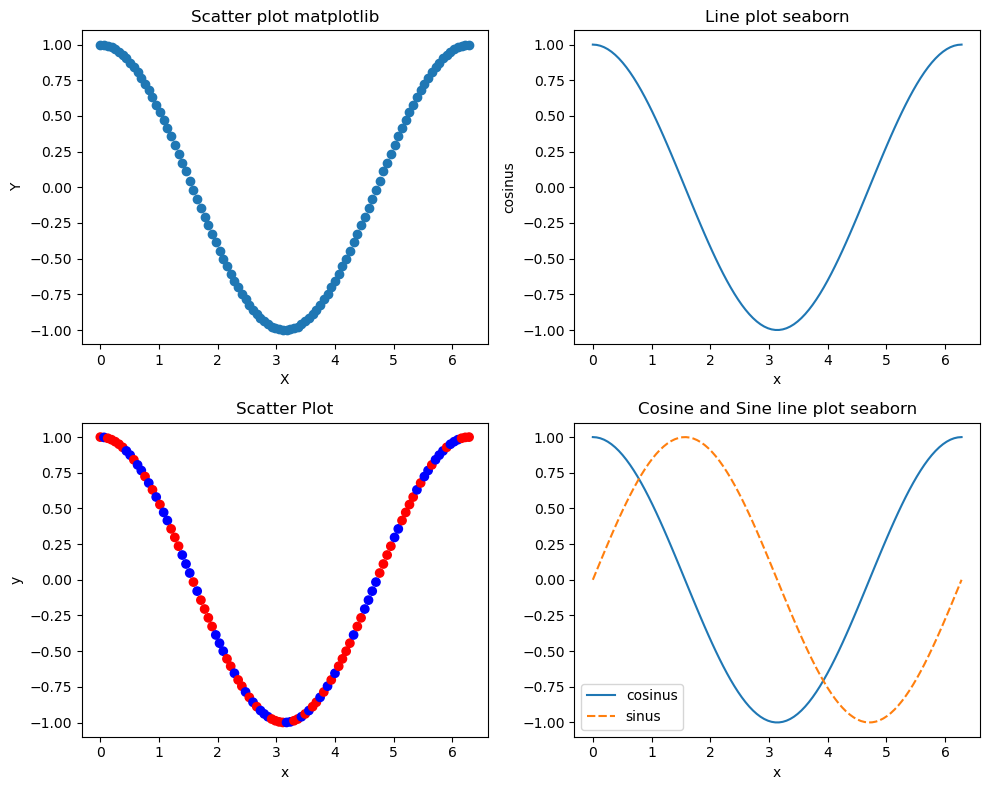

In [72]:
# %%
# Subfigures in matplotlib: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Set the title for each subplot
# Comment: You can do this in a loop too!
axs[0, 0].set_title("Scatter plot matplotlib")
axs[0, 1].set_title("Line plot seaborn")
axs[1, 0].set_title("Colored scatter plot matplotlib")
axs[1, 1].set_title("Cosine and Sine line plot seaborn")

# Scatter plot
axs[0, 0].scatter(x, y)
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('Y')

# Lineplot plot seaborn
df = pd.DataFrame({'x' : x, 'cosinus' : y})
sns.lineplot(df, x = 'x', y = 'cosinus', ax=axs[0, 1])

# Colored scatter plot
axs[1,0].scatter(x, y, color = coin_flip_color)
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('y')
axs[1,0].set_title('Scatter Plot')

# Cosine and sinus with seaborn
df = pd.DataFrame({'x' : x, 'cosinus' : y,
                   'sinus': z}).set_index("x")
sns.lineplot(data=df, ax=axs[1, 1])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()